## Zigbang 원룸 매물 데이터 수집

In [1]:
import requests
import pandas as pd

#### Process
    - 동이름으로 위도 경도 구하기
    - 위도 경도로 geohash 알아내기
    - geohash로 매물 아이디 가져오기
    - 매물 아이디로 매물 정보 가져오기

### 1\. 동이름으로 위도 경도 구하기

In [38]:
# url = 'https://apis.zigbang.com/v2/search?leaseYn=N&q=%EB%A7%9D%EC%9B%90%EB%8F%99&serviceType=%EC%9B%90%EB%A3%B8'
# url decoder: https://meyerweb.com/eric/tools/dencoder/ 이용해 url 디코딩
addr = '망원동'
url = f'https://apis.zigbang.com/v2/search?leaseYn=N&q={addr}&serviceType=원룸'

response = requests.get(url)
response

<Response [200]>

In [39]:
response.text

'{"success":true,"code":"200","items":[{"id":4002,"type":"address","name":"망원동","hint":"","description":"서울특별시 마포구 망원동","lat":37.556785583496094,"lng":126.9013442993164,"zoom":5,"polygon":[],"_score":null,"_source":{"name_length":3,"local1":"서울시","local2":"마포구","local3":"망원동","web_level":15,"web_lat":37.556785583496094,"web_lng":126.9013442993164,"app_level":15,"app_lat":37.556785583496094,"app_lng":126.9013442993164,"법정동코드":"1144012300"},"zoom_level":{"google":15,"daum":4},"zoom_level_v2":{"app":5,"web":4}}],"next":null,"limit":0}'

In [40]:
response.json() # 딕셔너리 데이터로 변환

{'success': True,
 'code': '200',
 'items': [{'id': 4002,
   'type': 'address',
   'name': '망원동',
   'hint': '',
   'description': '서울특별시 마포구 망원동',
   'lat': 37.556785583496094,
   'lng': 126.9013442993164,
   'zoom': 5,
   'polygon': [],
   '_score': None,
   '_source': {'name_length': 3,
    'local1': '서울시',
    'local2': '마포구',
    'local3': '망원동',
    'web_level': 15,
    'web_lat': 37.556785583496094,
    'web_lng': 126.9013442993164,
    'app_level': 15,
    'app_lat': 37.556785583496094,
    'app_lng': 126.9013442993164,
    '법정동코드': '1144012300'},
   'zoom_level': {'google': 15, 'daum': 4},
   'zoom_level_v2': {'app': 5, 'web': 4}}],
 'next': None,
 'limit': 0}

In [41]:
data = response.json()['items'][0] # 같은 동 이름이 여러개일 수 있으므로 리스트로 표현됨
# [0]: 첫번째 값만 가져오겠다!
data
# 정확하게 하려면 신사동 말고 ㅇㅇ구 신사동 이런식으로 자세히 써줘야 함

{'id': 4002,
 'type': 'address',
 'name': '망원동',
 'hint': '',
 'description': '서울특별시 마포구 망원동',
 'lat': 37.556785583496094,
 'lng': 126.9013442993164,
 'zoom': 5,
 'polygon': [],
 '_score': None,
 '_source': {'name_length': 3,
  'local1': '서울시',
  'local2': '마포구',
  'local3': '망원동',
  'web_level': 15,
  'web_lat': 37.556785583496094,
  'web_lng': 126.9013442993164,
  'app_level': 15,
  'app_lat': 37.556785583496094,
  'app_lng': 126.9013442993164,
  '법정동코드': '1144012300'},
 'zoom_level': {'google': 15, 'daum': 4},
 'zoom_level_v2': {'app': 5, 'web': 4}}

In [42]:
lat, lng = data['lat'], data['lng']
lat, lng

(37.556785583496094, 126.9013442993164)

### 2\. 위도 경도로 geohash 알아내기

In [43]:
!pip install geohash2
# 위경도를 geohash로 변환해주는 패키지

In [44]:
import geohash2

In [45]:
geohash = geohash2.encode(lat, lng, precision = 5)
# precision: 영역 (숫자가 커질수록 영역의 규모가 작아짐)
geohash

'wydjx'

### 3\. geohash로 매물 아이디 가져오기

In [46]:
url = f'https://apis.zigbang.com/v2/items/oneroom?geohash={geohash}&depositMin=0&rentMin=0&salesTypes[0]=전세&salesTypes[1]=월세&domain=zigbang&checkAnyItemWithoutFilter=true'
# 역시 디코딩해서 한글로 변환한 뒤 넣어줌

response = requests.get(url)
response

<Response [200]>

In [47]:
response.text[:300]

'{"items":[{"lat":37.52957191936743,"lng":126.900435212516,"itemId":39817840,"itemBmType":"ZIGBANG"},{"lat":37.52955993739013,"lng":126.89979844625006,"itemId":40042434,"itemBmType":"ZIGBANG"},{"lat":37.52907304257156,"lng":126.90042820847293,"itemId":40058332,"itemBmType":"ZIGBANG"},{"lat":37.529073'

In [48]:
items = response.json()['items']
items[:3]

[{'lat': 37.52957191936743,
  'lng': 126.900435212516,
  'itemId': 39817840,
  'itemBmType': 'ZIGBANG'},
 {'lat': 37.52955993739013,
  'lng': 126.89979844625006,
  'itemId': 40042434,
  'itemBmType': 'ZIGBANG'},
 {'lat': 37.52907304257156,
  'lng': 126.90042820847293,
  'itemId': 40058332,
  'itemBmType': 'ZIGBANG'}]

In [54]:
items = [item['itemId'] for item in items]
len(items), items[:3]

(605, [39817840, 40042434, 40058332])

items 너무 많을 경우 나눠서 가져와야 함 (사이트에서 막아놓음)

### 4\. 매물 아이디로 매물 정보 가져오기

In [58]:
url = 'https://apis.zigbang.com/v2/items/list'
# POST 방식
params = {
    'domain': 'zigbang',
    'item_ids': items,
}

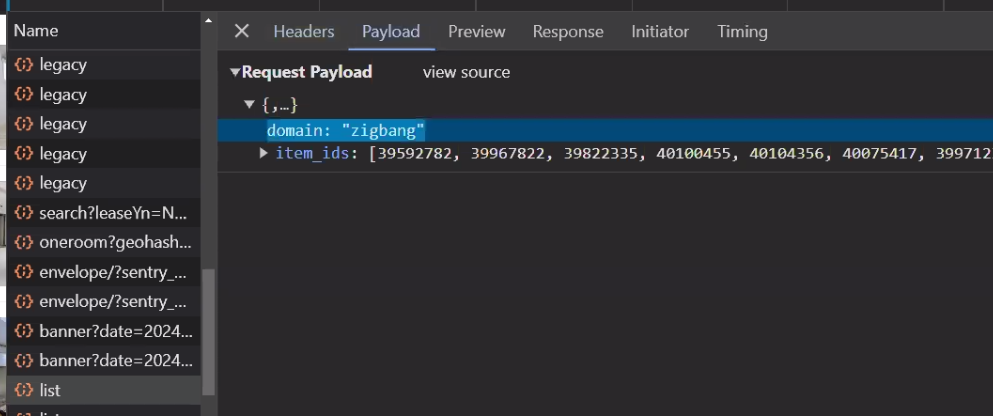

Payload 탭 참고해 params에 넣어줄 데이터들 보기

In [59]:
# 한글 없으므로 json.dumps(params) 해줄 필요 X
response = requests.post(url, params)
response

<Response [200]>

In [64]:
response.text[:2000]

'{"items":[{"item_id":39817840,"section_type":null,"images_thumbnail":"https://ic.zigbang.com/ic/items/39817840/1.jpg","sales_type":"월세","sales_title":"월세","deposit":1000,"rent":50,"size_m2":19.83,"공급면적":{"m2":19.83,"p":"6"},"전용면적":{"m2":19.83,"p":"6"},"계약면적":null,"room_type_title":null,"floor":"2","floor_string":"2","building_floor":"9","title":"당산동에서 이보다 좋은 매물 못찾습니다","is_first_movein":null,"room_type":"02","status":true,"tags":["추천"],"service_type":"원룸","random_location":{"lat":37.529100299717015,"lng":126.89981677937509},"manage_cost":"7","reg_date":"2024-02-14T17:10:06+09:00","is_new":false,"addressOrigin":{"local1":"서울시","local2":"영등포구","local3":"당산동4가","local4":"","fullText":"서울시 영등포구 당산동4가","localText":"영등포구 당산동4가"},"action":{"isRead":false,"readAt":null,"isInquired":false,"inquiredAt":null,"isRewarded":false,"rewardedAt":null,"isReported":false,"reportedAt":null,"isChecked":false,"checkedAt":null,"isZzim":false},"contract":"","address":"영등포구 당산동4가","is_zzim":false,"address1":"서

In [75]:
data = response.json()['items']
print(len(data))
data[:2]

605


[{'item_id': 39817840,
  'section_type': None,
  'images_thumbnail': 'https://ic.zigbang.com/ic/items/39817840/1.jpg',
  'sales_type': '월세',
  'sales_title': '월세',
  'deposit': 1000,
  'rent': 50,
  'size_m2': 19.83,
  '공급면적': {'m2': 19.83, 'p': '6'},
  '전용면적': {'m2': 19.83, 'p': '6'},
  '계약면적': None,
  'room_type_title': None,
  'floor': '2',
  'floor_string': '2',
  'building_floor': '9',
  'title': '당산동에서 이보다 좋은 매물 못찾습니다',
  'is_first_movein': None,
  'room_type': '02',
  'status': True,
  'tags': ['추천'],
  'service_type': '원룸',
  'random_location': {'lat': 37.529100299717015, 'lng': 126.89981677937509},
  'manage_cost': '7',
  'reg_date': '2024-02-14T17:10:06+09:00',
  'is_new': False,
  'addressOrigin': {'local1': '서울시',
   'local2': '영등포구',
   'local3': '당산동4가',
   'local4': '',
   'fullText': '서울시 영등포구 당산동4가',
   'localText': '영등포구 당산동4가'},
  'action': {'isRead': False,
   'readAt': None,
   'isInquired': False,
   'inquiredAt': None,
   'isRewarded': False,
   'rewardedAt': Non

In [88]:
# jupyter 노트북에서 모든 열 출력하게끔 (default = 20개)
pd.options.display.max_columns = 40

# max_rows의 default는 60개

In [82]:
df = pd.DataFrame(data)
df[:2]

,item_id,section_type,images_thumbnail,sales_type,sales_title,deposit,rent,size_m2,공급면적,전용면적,계약면적,room_type_title,floor,floor_string,building_floor,title,is_first_movein,room_type,status,tags,service_type,random_location,manage_cost,reg_date,is_new,addressOrigin,action,contract,address,is_zzim,address1,address2,address3,item_bm_type,zikim
0,39817840,None,https://ic.zigbang.com/ic/items/39817840/1.jpg,월세,월세,1000,50,19.83,"{'m2': 19.83, 'p': '6'}","{'m2': 19.83, 'p': '6'}",None,None,2,2,9,당산동에서 이보다 좋은 매물 못찾습니다,None,02,True,[추천],원룸,"{'lat': 37.529100299717015, 'lng': 126.8998167...",7,2024-02-14T17:10:06+09:00,False,"{'local1': '서울시', 'local2': '영등포구', 'local3': ...","{'isRead': False, 'readAt': None, 'isInquired'...",,영등포구 당산동4가,False,서울시 영등포구 당산동4가,None,None,ZIGBANG,NaN
1,40042434,None,https://ic.zigbang.com/ic/items/40042434/1.jpg,월세,월세,1000,50,22.48,"{'m2': 22.48, 'p': '6.8'}","{'m2': 22.48, 'p': '6.8'}",None,None,5,5,9,당산역부근 깔끔함 신축급컨디션 일단클릭,None,01,True,[추천],원룸,"{'lat': 37.529576502198275, 'lng': 126.8998243...",7,2024-03-07T10:52:07+09:00,True,"{'local1': '서울시', 'local2': '영등포구', 'local3': ...","{'isRead': False, 'readAt': None, 'isInquired'...",,영등포구 당산동4가,False,서울시 영등포구 당산동4가,None,None,ZIGBANG,NaN


In [83]:
df.columns

Index(['item_id', 'section_type', 'images_thumbnail', 'sales_type',
       'sales_title', 'deposit', 'rent', 'size_m2', '공급면적', '전용면적', '계약면적',
       'room_type_title', 'floor', 'floor_string', 'building_floor', 'title',
       'is_first_movein', 'room_type', 'status', 'tags', 'service_type',
       'random_location', 'manage_cost', 'reg_date', 'is_new', 'addressOrigin',
       'action', 'contract', 'address', 'is_zzim', 'address1', 'address2',
       'address3', 'item_bm_type', 'zikim'],
      dtype='object')

In [84]:
columns = ['item_id', 'deposit', 'rent', 'size_m2', 'title', 'address1']

In [91]:
df = pd.DataFrame(data)[columns]
df[:2]

,item_id,deposit,rent,size_m2,title,address1
0,39817840,1000,50,19.83,당산동에서 이보다 좋은 매물 못찾습니다,서울시 영등포구 당산동4가
1,40042434,1000,50,22.48,당산역부근 깔끔함 신축급컨디션 일단클릭,서울시 영등포구 당산동4가


In [92]:
df = df[df['address1'].str.contains('망원동')].reset_index(drop=True) # 망원동에 있는 매물만 출력
# geohash에 의해 특정 영역에만 포함된다면, 망원동 아니어도 뜨는 경우가 있으므로
df

,item_id,deposit,rent,size_m2,title,address1
0,39809114,22800,40,26.68,보증보험가능 투룸 망원동,서울시 마포구 망원동
1,39809187,22800,40,26.68,보증보험가능 투룸 망원동,서울시 마포구 망원동
2,39608712,31000,0,29.67,보증보험가능 옵션과 엘리베이터 있는 2룸 전세,서울시 마포구 망원동
3,39612133,29600,14,29.67,한강변 2년된 신축 보증보험 가입가능한 매물,서울시 마포구 망원동
4,39874932,29600,14,29.67,"HUG버팀목, 보증보험 신축급 투룸",서울시 마포구 망원동
...,...,...,...,...,...,...
58,39591216,45000,0,99.20,"햇빛 가득한 깔끔한 쓰리룸, 즉시 입주 가능",서울시 마포구 망원동
59,39677924,41000,10,68.68,구청역세권 망원초근처 채광굿 방3 화2 베란다,서울시 마포구 망원동
60,40099714,43000,0,68.68,구청역세권 망원초근처 채광굿 방3 화2 베란다,서울시 마포구 망원동
61,40009046,500,50,13.22,신축급풀옵션마포구청역5분깔끔한방,서울시 마포구 망원동
